### <center>A Complete DS Project</center>


## Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?

This project will represent a full data science life cycle, from data cleaning and feature selection to machine learning. In this project We will focus on credit modelling, focusing on modeling a borrower's credit risk.  We'll be working with financial lending data from __Lending Club__. Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 

_"Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data (and their own data science process!) and assign an interest rate to the borrower. The interest rate is the percent in addition to the requested loan amount the borrower has to pay back._

_A higher interest rate means that the borrower is riskier and more unlikely to pay back the loan while a lower interest rate means that the borrower has a good credit history is more likely to pay back the loan. The interest rates range from 5.32% all the way to 30.99% and each borrower is given a grade according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace._

_Investors are primarily interested in receiveing a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the origination fee that Lending Club charges._

_The borrower then makes monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off to start to see money back. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition the requested amount. Many loans aren't completely paid off on time, however, and some borrowers default on the loan."_

Here's a diagram from Bible Money Matters that sums up the process:

![Test](./pic.jpg)

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_columns', None)  

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline


In [2]:
raw_data = pd.read_csv('./LoanStats3a.csv', skiprows = 1, low_memory = False) #dataset
data_dict = pd.read_csv('./data_dict.csv') #contains information about columns.
data_dict.set_index(data_dict.LoanStatNew, drop = True, inplace = True)
data_dict.drop('LoanStatNew', axis = 1, inplace = True)

raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,Dec-2017,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,

In [3]:
print"There are ", raw_data.shape[0], " rows and ", raw_data.shape[1], "columns in the dataset."
print"Missing values: ", raw_data.isnull().any().sum()

There are  42538  rows and  145 columns in the dataset.
Missing values:  145


### Let's remove all the columns containing more than 50% missing values:

In [4]:
fifty_percent = len(raw_data) / 2
df = raw_data.dropna(thresh = fifty_percent, axis = 1)

In [5]:
print"Shape of the dataset after dropping columns containing more than 50% missing values : ", df.shape

Shape of the dataset after dropping columns containing more than 50% missing values :  (42538, 54)


_Great, We have lost quite a few columns! Now we are left with 54 columns, still a lot to better understand these columns so we will look at the few columns at a time!_

### Better understanding of columns.  1/3 of columns

In [6]:
data_dict.loc[df.iloc[:,:18].columns,:]

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*


Lets Drop funded_amnt and funded_amnt_inv from data frame, as they leak data from future.
We will use __loan_status__ as our target columns as it directly describe the status of the loan.

In [7]:
df.drop(['funded_amnt', 'funded_amnt_inv'], axis =1, inplace = True )
print("Shape of df: ", df.shape)

('Shape of df: ', (42538, 52))


/Users/lucky/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 2/3 Of Columns

In [8]:
data_dict.loc[df.iloc[:,18:36].columns,:]

,Description
LoanStatNew,
addr_state,The state provided by the borrower in the loan application
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
earliest_cr_line,The month the borrower's earliest reported credit line was opened
inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
open_acc,The number of open credit lines in the borrower's credit file.
pub_rec,Number of derogatory public records
revol_bal,Total credit revolving balance
revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."


__zip_code__ contains only first 3 numbers, __out_prncp__ shows remaining principal for total amount funded, __out_prncp_inv__, __total_pymnt__, __total_pymnt_inv__, __total_rec_prncp__, all these columns describe properties of the loan after it's fully funded and started to be paid off! This information is not available to an investor at lending club before the loan is fully funded. So, we will not include these columns in our model.

In [9]:
df.drop(['zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'], inplace = True, axis = 1)
df.shape

/Users/lucky/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(42538, 46)

## 3/3 Columns

In [10]:
data_dict.loc[df.iloc[:,36:].columns]

,Description
LoanStatNew,
policy_code,publicly available policy_code=1\nnew products not publicly available policy_code=2
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
chargeoff_within_12_mths,Number of charge-offs within 12 months
delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
pub_rec_bankruptcies,Number of public record bankruptcies
tax_liens,Number of tax liens
hardship_flag,NaN
disbursement_method,NaN


__total_rec_int__, __total_rec_late_fee__, __recoveries__, __collection_recovery_fee__, __last_pymnt_d__, and __last_pymnt_amnt__ seems like of these columns leak data from future.

In [11]:
#df.drop(['total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'], inplace= True, axis =1)
print("Shape of df: ", df.shape)

('Shape of df: ', (42538, 46))


By becoming familiar with the columns in the dataset, we were able to reduce the number of columns from 54 to 40.

In [12]:
df.loan_status.value_counts(dropna= False)/len(df)

Fully Paid                                             0.802012
Charged Off                                            0.133293
Does not meet the credit policy. Status:Fully Paid     0.046735
Does not meet the credit policy. Status:Charged Off    0.017890
NaN                                                    0.000071
Name: loan_status, dtype: float64

According to the information available on Lending Clubs Website, A Fully Paid account means = Loan Paid off in time and "Account becomes Charged off when there is no longer a reasonable expectation of further payment." Could not find definition of other two. 
So Lets just remove all the Loans that are not __Fully Paid__ or __Charged Off__, and lets tranform the Fully Paid values to 1 and Charged Off to 0. So it will become binary Classification problem.

In [13]:
mapping_dict = {
    "loan_status":{
    "Fully Paid":1,
    "Charged Off": 0
    }}
df = df.replace(mapping_dict)
df.loan_status.value_counts(dropna= False)/len(df)

1                                                      0.802012
0                                                      0.133293
Does not meet the credit policy. Status:Fully Paid     0.046735
Does not meet the credit policy. Status:Charged Off    0.017890
NaN                                                    0.000071
Name: loan_status, dtype: float64

In [14]:
df = df[(df['loan_status'] == 1) | (df['loan_status'] == 0)]
df.loan_status.value_counts(dropna = False)

1    34116
0     5670
Name: loan_status, dtype: int64

In [15]:
df.shape

(39786, 46)

let's look for any columns that contain only one unique value and remove them. These columns won't be useful for the model since they don't add any information to each loan application. In addition, removing these columns will reduce the number of columns

In [16]:
original_columns = df.columns
drop_columns = []
for each in original_columns:
    col_series = df[each].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(each)
df = df.drop(drop_columns, axis = 1)

In [17]:
df.shape

(39786, 35)

Good we further reduced number of columns to 35. We dropped 11 columns which only contained 1 unique value.

### Preparing the Features

In [18]:
df.isnull().sum().sort_values(ascending = False).head(8)

desc                    12966
emp_title                2466
pub_rec_bankruptcies      697
last_pymnt_d               71
revol_util                 50
title                      10
last_credit_pull_d          2
installment                 0
dtype: int64

Lets start by removing __emp_title__, __desc__, and __pub_rec_bankruptcies__ columns completely as the number of missing values is a lot in those columns. And for rest of the columns we can remove the rows just containing missing values.

In [19]:
print "Shape of df before: ", df.shape
df.drop(['emp_title', 'pub_rec_bankruptcies', 'desc'], axis = 1, inplace = True)
df.dropna(inplace = True)
print("Number of missing values: ",df.isnull().any().sum())
print "Shape of df After dropping missing values: ", df.shape
print(df.dtypes.value_counts())

Shape of df before:  (39786, 35)
('Number of missing values: ', 0)
Shape of df After dropping missing values:  (39657, 32)
object     17
float64    15
dtype: int64


We took care of Nan Values, Now we have about 17 columns of type object we will need to convert these columns to Numerical columns so we can use them in our models.

In [20]:
df.select_dtypes(include=["object"]).head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d,debt_settlement_flag
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-2011,1,credit_card,Computer,AZ,Jan-1985,83.7%,Jan-2015,Dec-2017,N
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-2011,0,car,bike,GA,Apr-1999,9.4%,Apr-2013,Oct-2016,N
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-2011,1,small_business,real estate business,IL,Nov-2001,98.5%,Jun-2014,Jun-2017,N
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-2011,1,other,personel,CA,Feb-1996,21%,Jan-2015,Apr-2016,N
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-2011,1,other,Personal,OR,Jan-1996,53.9%,Jan-2017,Jan-2017,N


In [21]:
df.term.value_counts()

 36 months    28991
 60 months    10666
Name: term, dtype: int64

In [22]:
df['term'] = df['term'].apply(lambda x: x.strip())
df['term'] = df['term'].apply(lambda x: 1 if x == '60 months' else 0)
df.term.value_counts()

0    28991
1    10666
Name: term, dtype: int64

In [23]:
print df.int_rate.value_counts().head() # We can strip "%" sign and convert these series to float series.
print df.revol_util.value_counts().head()

 10.99%    958
 13.49%    829
 11.49%    820
  7.51%    786
  7.88%    725
Name: int_rate, dtype: int64
0%       978
0.2%      62
63%       62
40.7%     59
0.1%      58
Name: revol_util, dtype: int64


In [24]:
df["int_rate"] = df["int_rate"].str.rstrip("%").astype("float")
df['revol_util'] = df['revol_util'].str.rstrip("%").astype("float")
print df.int_rate.dtypes
print df.revol_util.dtypes

float64
float64


In [25]:
print df.emp_length.value_counts()
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
df = df.replace(mapping_dict)
print df.emp_length.value_counts()


10+ years    8888
< 1 year     4569
2 years      4383
3 years      4087
4 years      3428
5 years      3270
1 year       3231
6 years      2226
7 years      1770
8 years      1480
9 years      1256
n/a          1069
Name: emp_length, dtype: int64
10    8888
0     5638
2     4383
3     4087
4     3428
5     3270
1     3231
6     2226
7     1770
8     1480
9     1256
Name: emp_length, dtype: int64


In [26]:
print df.grade.value_counts()
df.drop('sub_grade', axis = 1, inplace = True)

B    12016
A    10077
C     8071
D     5293
E     2839
F     1047
G      314
Name: grade, dtype: int64


In [27]:
df.loan_status = df.loan_status.astype(float)
df.select_dtypes(include=["object"]).head()

,grade,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d,debt_settlement_flag
0,B,RENT,Verified,Dec-2011,credit_card,Computer,AZ,Jan-1985,Jan-2015,Dec-2017,N
1,C,RENT,Source Verified,Dec-2011,car,bike,GA,Apr-1999,Apr-2013,Oct-2016,N
2,C,RENT,Not Verified,Dec-2011,small_business,real estate business,IL,Nov-2001,Jun-2014,Jun-2017,N
3,C,RENT,Source Verified,Dec-2011,other,personel,CA,Feb-1996,Jan-2015,Apr-2016,N
4,B,RENT,Source Verified,Dec-2011,other,Personal,OR,Jan-1996,Jan-2017,Jan-2017,N


In [28]:
print df.grade.value_counts()
print df.home_ownership.value_counts()
print df.verification_status.value_counts()
print df.purpose.value_counts()

B    12016
A    10077
C     8071
D     5293
E     2839
F     1047
G      314
Name: grade, dtype: int64
RENT        18832
MORTGAGE    17675
OWN          3051
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16855
Verified           12814
Source Verified     9988
Name: verification_status, dtype: int64
debt_consolidation    18633
credit_card            5131
other                  3977
home_improvement       2977
major_purchase         2177
small_business         1819
car                    1549
wedding                 941
medical                 693
moving                  581
vacation                380
house                   380
educational             317
renewable_energy        102
Name: purpose, dtype: int64


In [29]:
cat_columns = ["home_ownership","grade", "verification_status", "purpose"]
dummy_df = pd.get_dummies(df[cat_columns])
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(cat_columns, axis=1)
df.select_dtypes(include=["object"]).head(2)

,issue_d,title,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d,debt_settlement_flag
0,Dec-2011,Computer,AZ,Jan-1985,Jan-2015,Dec-2017,N
1,Dec-2011,bike,GA,Apr-1999,Apr-2013,Oct-2016,N


In [30]:
df.drop(['issue_d', 'title', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'debt_settlement_flag'], axis = 1, inplace = True)

In [31]:
print df.shape
df.head()

(39657, 49)


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,0,10.65,162.87,10,24000.0,1.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,863.16,0.00,0.0,0.00,171.62,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,1,15.27,59.83,0,30000.0,0.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,435.17,0.00,122.9,1.11,119.66,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,0,15.96,84.33,10,12252.0,1.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,605.67,0.00,0.0,0.00,649.91,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,0,13.49,339.31,10,49200.0,1.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,2214.92,16.97,0.0,0.00,357.48,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,1,12.69,67.79,1,80000.0,1.0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,1066.91,0.00,0.0,0.00,67.30,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Machine Learning

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
ss = StandardScaler()
#Xs = ss.fit_transform(X)

## Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?


## Baseline

In [33]:
sum(df.loan_status)/(float(len(df.loan_status)))

0.85919257634213375

__There is a significant class imbalance in the loan_status column. There are 6 times as many loans that were paid off on time (1), than loans that weren't paid off on time (0). This causes a major issue when we use accuracy as a metric. This is because due to the class imbalance, a classifier can predict 1 for every row, and still have high accuracy in this case of 85.9% .__

In [34]:
df.loan_status = df.loan_status.astype(int)
X = df.drop(['loan_status'], axis = 1 )
y = df.loan_status

__Logistic Regression + Cross Validation__

In [35]:
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=5)
scores

array([ 0.99092284,  0.98651034,  0.96356531,  0.97616946,  0.96179067])

__Random Forest Classifier + crossvalidation__

In [36]:
cv = StratifiedKFold(n_splits=10, random_state=21, shuffle=True)
rf = RandomForestClassifier()
cross_val_score(rf, X, y, cv=cv)

array([ 0.99899168,  0.99798336,  0.99823544,  0.99773071,  0.99949559,
        0.99873897,  0.99848676,  0.99848676,  0.99949559,  0.99924338])

### With Logistic regression and Random Forest Classifier we have R^2 close to .99. and our baseline is .85! And so fare we have not tuned our model w/ params, so which indicates the possibility of leakage, There are possibly few features that are leaking the information from future. So, now we will have to check feature importance of each feature and check what those features represents in Data dict (Which contains information about each and every column.) and remove them from our X if they represent the information from future.

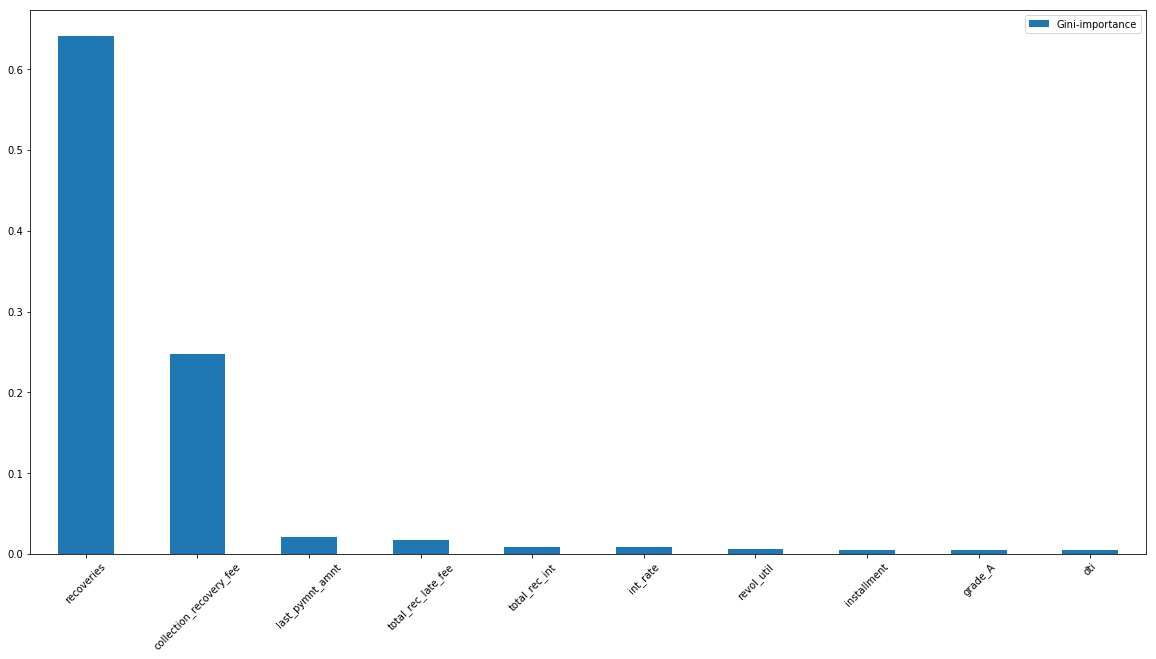

In [37]:
rf.fit(X, y)
#do code to support model
#"X" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending =False).head(10).plot(kind='bar', rot=45, figsize=(20,10));




In [38]:
data_dict.loc[['recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rec_int', 'total_rec_late_fee'],:]

,Description
LoanStatNew,
recoveries,post charge off gross recovery
collection_recovery_fee,post charge off collection fee
last_pymnt_amnt,Last total payment amount received
total_rec_int,Interest received to date
total_rec_late_fee,Late fees received to date


ahhh! All above columns are leaking information from future, we do not have this information present at the time of an application. So, we are going to remove these features from our X and we will try our model again. And they should score below or close to our baseline.

In [39]:
X.drop(['recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rec_int', 'total_rec_late_fee'], axis = 1, inplace = True)

__Logistic Regression + Cross Validation__

In [40]:
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=5)
scores

array([ 0.8587998 ,  0.85804337,  0.85867373,  0.85916026,  0.85876419])

__Random Forest Classifier + crossvalidation__

In [41]:
cv = StratifiedKFold(n_splits=10, random_state=21, shuffle=True)
rf = RandomForestClassifier()
cross_val_score(rf, X, y, cv=cv)

array([ 0.84698765,  0.83287119,  0.84093774,  0.8366112 ,  0.84842371,
        0.84186633,  0.83984868,  0.83909206,  0.84186633,  0.83858764])

This looks much better, Now our goal is to beat the baseling and further improve our scores.

In [44]:
X.shape

(39657, 43)